In [190]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import numpy as np
from scipy.stats import linregress
import datetime   
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [191]:
mypath='C:/Users/sara/Documents/5anno/TESI/tracciati/ConversioneExcel/A E12.06.18'    
df_spo2 = pd.read_csv( mypath+'/SpO2_PDS.csv', names=['time', 'spO2'])
df_activity = pd.read_csv( mypath+'/Activity_PDS.csv', names=['time', 'activity'])
spo2_array=df_spo2['spO2']
time_array=df_spo2['time']
activity_array=df_activity['activity']
time_activity_array=df_activity['time']

In [192]:
def remove_days(time):
    if(time>86400):
        time=time-86400
    return time

<Figure size 432x288 with 0 Axes>

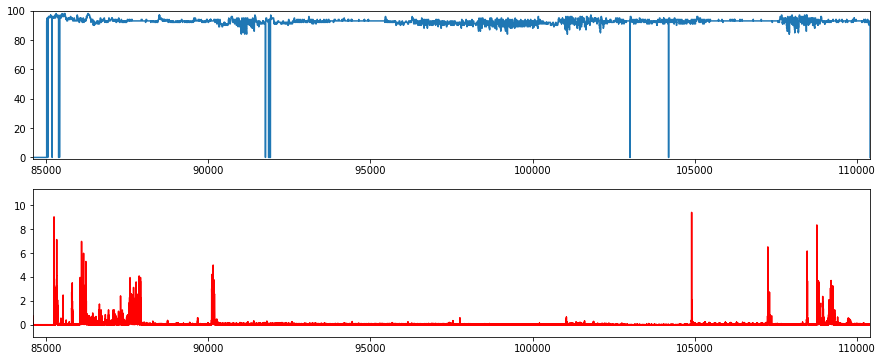

In [193]:
plt.figure()
plt.figure(figsize=(15,6))
plt.title('Plot spO2')
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
#plt.subplot(2, 1, 1)
ax1.axis([time_array[0],time_array[len(time_array)-1],-1,100])
ax1.step(time_array,spo2_array)
ax2.axis([time_array[0],time_array[len(time_array)-1],-1,max(activity_array)+2])
ax2.step(time_activity_array,activity_array,c='r')

### Preprocessing spO2

In [194]:
#Outlier noise
str(datetime.timedelta(seconds=time_array[len(time_array)-1]))
index=df_spo2[df_spo2.spO2 == 0].index
#str(datetime.timedelta(seconds=time_array[58759]))
df_spo2=df_spo2.drop(df_spo2.index[index])  
df_outlier=pd.DataFrame()
df_outlier['time']=np.array(df_spo2['time'])
df_outlier['spO2']=np.array(df_spo2['spO2'])

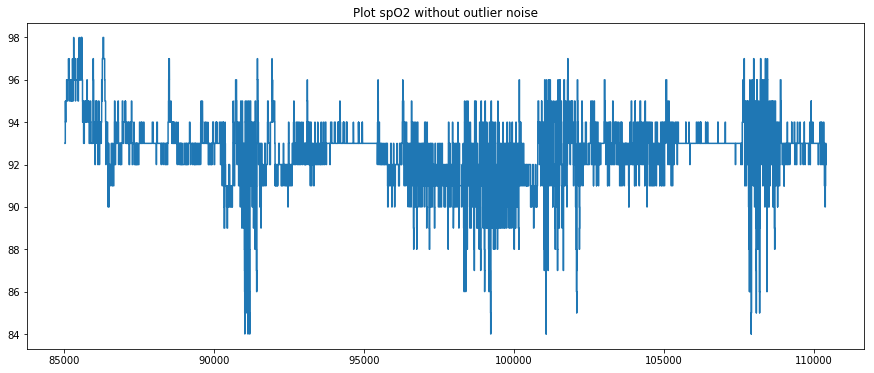

In [195]:
plt.figure(figsize=(15,6))
plt.title('Plot spO2 without outlier noise')
time_array=df_outlier['time']
spo2_array=df_outlier['spO2']
plt.step(time_array,spo2_array)

In [196]:
# Fluctuation noise


### Detect movements from activity

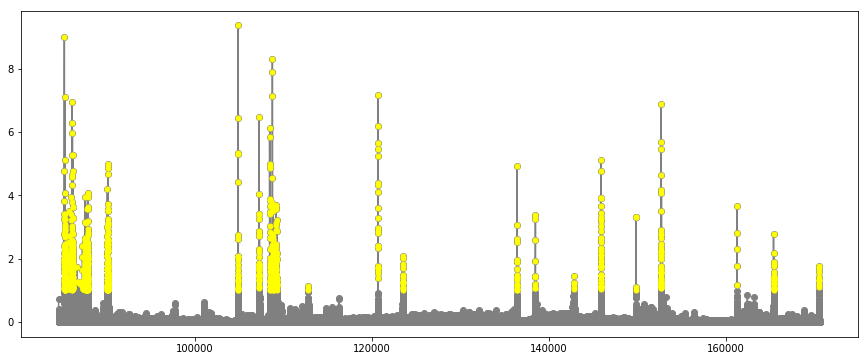

In [197]:
movements_index=[]
for i in range(0,len(activity_array)):
    if(activity_array[i]>1):
        movements_index.append(i)
plt.figure(figsize=(15,6))
plt.plot(time_activity_array,activity_array, marker='o', color="grey")
for i in range(0,len(movements_index)):
    plt.plot(time_activity_array[movements_index[i]],activity_array[movements_index[i]],  marker='o', markersize=5, color="yellow")

### Detect activity using time series

In [198]:
#divido la serie in intervalli di 1 minuto ciascuno e verifico la stazionarietà 
freqCampionamento=3
campioni_al_minuto=freqCampionamento*60
numero_intervalli=(len(activity_array)/campioni_al_minuto)
if((len(activity_array)%campioni_al_minuto)!=0):
    numero_intervalli=numero_intervalli+1
numero_intervalli=math.floor(numero_intervalli)

df_stazionarietà=pd.DataFrame()
inizioIntervallo=[]
fineIntervallo=[]
stazionario=[]
indice=[]
for i in range(0,numero_intervalli-2):    
    inizioIntervallo.append(time_activity_array[180*i])
    fineIntervallo.append(time_activity_array[180*i+179])
    #inizioIntervallo.append(campioni_al_minuto*i)
    #fineIntervallo.append(campioni_al_minuto*i+campioni_al_minuto-1)
    result=adfuller(activity_array[campioni_al_minuto*i:campioni_al_minuto*i+campioni_al_minuto-1],autolag='AIC')
    stazionario.append(result[1])
    indice.append(i)
df_stazionarietà['inizioIntervallo']=inizioIntervallo
df_stazionarietà['fineIntervallo']=fineIntervallo
df_stazionarietà['stazionario']=stazionario
df_stazionarietà['indice']=indice
#print(df_stazionarietà)
#plt.figure(figsize=(15,6))
#time_array=df_outlier['time']
#spo2_array=df_outlier['spO2']
#plt.plot(time_activity_array[50000:70000],activity_array[50000:70000])
#plt.figure(figsize=(15,6))
#plt.step(time_activity_array[inizioIntervallo[258]:fineIntervallo[258]],activity_array[inizioIntervallo[258]:fineIntervallo[258]],)

84602.0
1434
      inizioIntervallo  fineIntervallo  stazionario  indice
11             85262.0         85322.0     0.459941      11
12             85322.0         85382.0     0.594922      12
16             85562.0         85622.0     1.000000      16
20             85802.0         85862.0     0.657197      20
23             85982.0         86042.0     1.000000      23
25             86102.0         86162.0     0.809212      25
34             86642.0         86702.0     0.350253      34
51             87662.0         87722.0     0.312261      51
55             87902.0         87962.0     0.546120      55
65             88502.0         88562.0     0.353409      65
66             88562.0         88622.0     0.432602      66
81             89462.0         89522.0     0.906578      81
84             89642.0         89702.0     0.621381      84
91             90062.0         90122.0     0.621495      91
273           100980.0        101040.0     0.886178     273
325           104100.0     

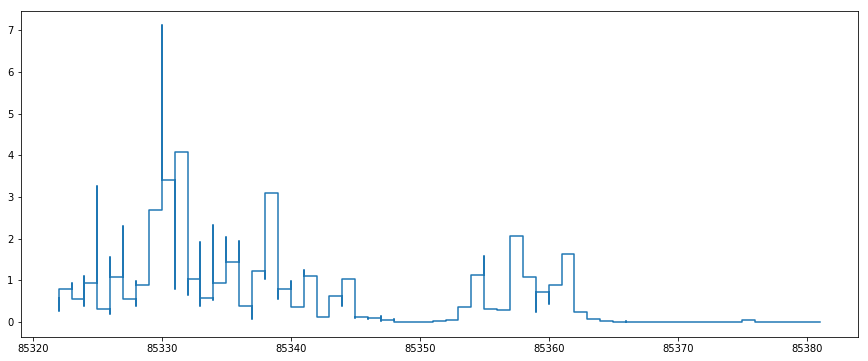

In [199]:
print(time_activity_array[campioni_al_minuto*0])
print(numero_intervalli)
print(df_stazionarietà.loc[df_stazionarietà['stazionario']>0.3])
#activity_array
plt.figure(figsize=(15,6))
i=12
print(df_stazionarietà.loc[[i]])
print(time_activity_array[campioni_al_minuto*i])
print(time_activity_array[campioni_al_minuto*i+campioni_al_minuto])
plt.step(time_activity_array[180*i:180*i+179],activity_array[180*i:180*i+179])


### Feature extraction 

In [200]:
desaturations=pd.DataFrame()
pstart=[]
pvalley1=[]
pvalley2=[]
pstop=[]
spo2_start=[]
spo2_stop=[]
spo2_start_s=[]
spo2_stop_s=[]
spo2_valley1=[]
plowest=[]
ptraslaction=[]
tdown=[]
tup=[]
tlast=[]
durata=[]
pv1=0
pv2=0
somma=0
'''somma=0
start_index=[]
stop_index=[]
pv1_index=[]
pv2_index=[]
stop=0'''
for i in range(0,len(spo2_array)):
    somma=somma+spo2_array[i]
xbase=1/len(spo2_array)*somma-10
CASE=0
discesa=False
minimo=100
for i in range(0,len(spo2_array)-2):
    if(CASE==0 and spo2_array[i]>spo2_array[i+1]):
        start_index=i
        minimo=100
        CASE=1
      #  minimo=spo2_array[i+1]
        discesa=True
    if(CASE==1 and spo2_array[i]==spo2_array[i+1]):
        if(discesa==True and spo2_array[i]<minimo):
            pv1=i
            minimo=spo2_array[i]
        discesa=False
    if(CASE==1 and spo2_array[i]>spo2_array[i+1]):
       # pv1=i
        pv2=i
      #  minimo=spo2_array[i+1]
        discesa=True
    if(CASE==1 and spo2_array[i]<spo2_array[i+1]):
        CASE=3
    if(CASE==3 and spo2_array[i]<spo2_array[i+1]):
        stop_index=i
        start_time=df_outlier['time'][start_index]
        valley1_time=df_outlier['time'][pv1]
        stop_time=df_outlier['time'][stop_index]
        spo2Stop=df_outlier['spO2'][stop_index]
        spo2Start=df_outlier['spO2'][start_index]
        d=stop_time-start_time
        if(d>9 and spo2Stop<=spo2Start*0.97):
            spo2_start_s.append(datetime.timedelta(seconds=remove_days(start_time)))
            spo2_stop_s.append(datetime.timedelta(seconds=remove_days(stop_time)))
           # start_time=remove_days(start_time)
          #  stop_time=remove_days(stop_time)
          #  valley1_time=remove_days(valley1_time)
            pstart.append(start_time)
            pstop.append(stop_time)
            spo2_start.append(spo2Start)
            spo2_stop.append(spo2Stop)
            spo2_valley1.append(df_outlier['spO2'][pv1])
            pvalley1.append(valley1_time)
            durata.append(d)
        CASE=0
desaturations['start_time']=pstart[0:len(pstart)]
desaturations['valley1']=pvalley1  
desaturations['stop_time']=pstop
desaturations['start_time_s']=spo2_start_s[0:len(pstart)]
desaturations['stop_time_s']=spo2_stop_s
desaturations['valley1_spO2']=spo2_valley1  
desaturations['start_spO2']=spo2_start[0:len(pstart)]
desaturations['stop_spO2']=spo2_stop  
desaturations['durata (s)']=durata  


In [201]:
desaturations


,start_time,valley1,stop_time,start_time_s,stop_time_s,valley1_spO2,start_spO2,stop_spO2,durata (s)
0,85597.0,85610.0,85619.0,23:46:37,23:46:59,94,97,94,22.0
1,85968.0,85989.0,85996.0,23:52:48,23:53:16,93,97,93,28.0
2,86152.0,86171.0,86174.0,23:55:52,23:56:14,92,95,92,22.0
3,86311.0,86386.0,86391.0,23:58:31,23:59:51,92,98,92,80.0
4,86444.0,86459.0,86462.0,00:00:44,00:01:02,90,94,90,18.0
5,86481.0,86489.0,86493.0,00:01:21,00:01:33,90,93,90,12.0
6,86684.0,86696.0,86709.0,00:04:44,00:05:09,92,95,92,25.0
7,86801.0,86812.0,86813.0,00:06:41,00:06:53,92,95,92,12.0
8,87245.0,87264.0,87284.0,00:14:05,00:14:44,92,95,92,39.0
9,88502.0,88517.0,88558.0,00:35:02,00:35:58,94,97,94,56.0


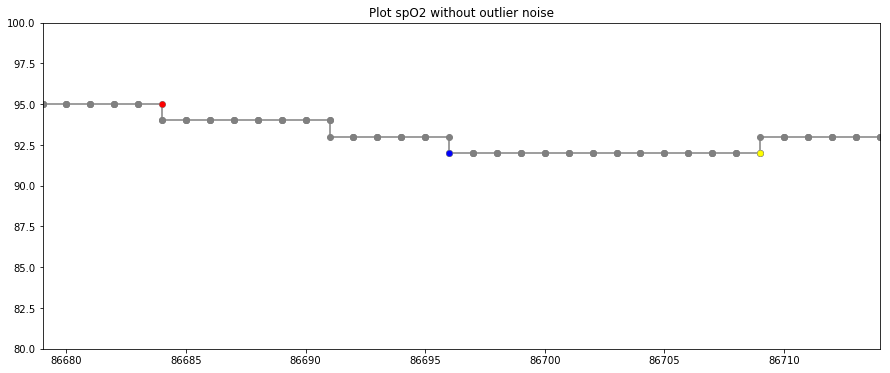

In [202]:
plt.figure(figsize=(15,6))
plt.title('Plot spO2 without outlier noise')
i=6
plt.axis([pstart[i]-5,pstop[i]+5,80,100])
time_array=df_outlier['time']
spo2_array=df_outlier['spO2']
plt.plot(df_outlier['time'],df_outlier['spO2'], marker='o', color="grey")
plt.plot(pstart[i],spo2_start[i],  marker='o', markersize=5, color="red")
plt.plot(pstop[i],spo2_stop[i],  marker='o', markersize=5, color="yellow")
plt.plot(pvalley1[i],spo2_valley1[i],  marker='o', markersize=5, color="blue")
#plt.plot(time_array[pv1_index[5]],spo2_array[pv1_index[5]],  marker='o', markersize=3, color="blue")
#plt.plot(time_array[pv2_index[5]],spo2_array[pv2_index[5]],  marker='o', markersize=3, color="green")

#### 

In [203]:
ODI=len(desaturations)
ODI

199

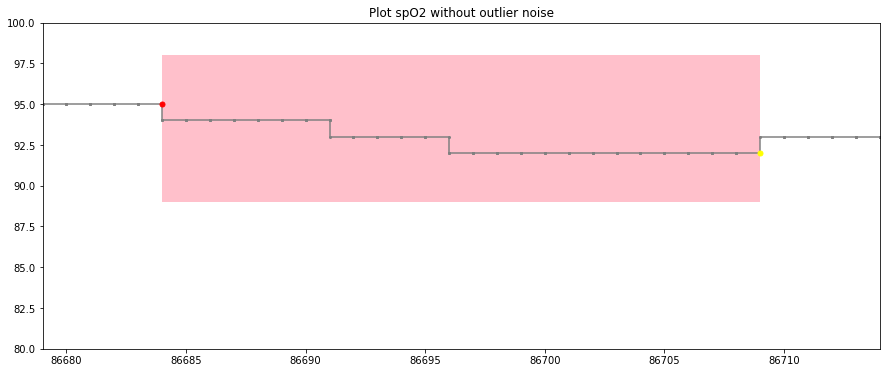

In [204]:
plt.figure(figsize=(15,6))
plt.title('Plot spO2 without outlier noise')
i=6
plt.axis([pstart[i]-5,pstop[i]+5,80,100])
time_array=df_outlier['time']
spo2_array=df_outlier['spO2']
plt.plot(df_outlier['time'],df_outlier['spO2'], marker='o',markersize=2, color="gray")
for i in range(0,len(desaturations)):
    plt.plot(pstart[i],spo2_start[i],  marker='o', markersize=5, color="red")
    plt.plot(pstop[i],spo2_stop[i],  marker='o', markersize=5, color="yellow")
    plt.fill_between([pstart[i],pstop[i]],spo2_start[i]+3,spo2_stop[i]-3,facecolor='pink')

In [205]:
0

0

,time,activity
0,84602.0,0.738850
1,84602.0,0.114440
2,84603.0,0.249640
3,84603.0,0.312200
4,84603.0,0.416270
5,84604.0,0.343330
6,84604.0,0.249640
7,84604.0,0.208140
8,84605.0,0.114440
9,84605.0,0.020753
